In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(1)

,city,driver_count,type
0,Richardfort,38,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(1)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873


In [5]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_type=city_data_df["type"].unique()
city_type

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
sum(city_data_df["type"]=="Suburban")

36

In [11]:
sum(city_data_df["type"]=="Rural")

18

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [17]:
#number of ride by city by type
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [18]:
#avg fair for each city type
rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [19]:
#average number of drivers
rural_driver_count=rural_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

FileNotFoundError: [Errno 2] No such file or directory: 'analysis/Fig1.png'

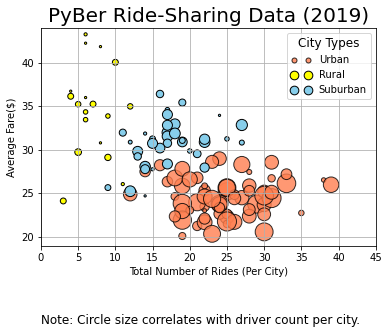

In [20]:
plt.scatter(urban_ride_count, urban_avg_fare, color="coral", edgecolor="black", linewidths=1, alpha=0.8,label="Urban",s=urban_driver_count*5)
plt.scatter(rural_ride_count, rural_avg_fare, color="yellow", edgecolor="black", label="Rural",s=rural_driver_count*5)
plt.scatter(suburban_ride_count, suburban_avg_fare, color="skyblue", edgecolor="black", label="Suburban",s=suburban_driver_count*5)
#plt.gca().invert_yaxis()
# Create labels for the x and y axes.
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
# Create a title.
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
# Add the legend.
# Create a legend
lgnd = plt.legend(fontsize="10", mode="Expanded",
         scatterpoints=2, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [25]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(0, 10, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.xlim(0, 45)
plt.ylim(19, 44)
plt.grid()

# Save the figure. Didn't work
plt.savefig("analysis/Fig1.png")

In [ ]:
# Get summary statistics.
urban_cities_df.describe()

In [ ]:
urban_ride_count.describe()

In [ ]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

In [ ]:
# Calculate the mode of the ride count for the urban cities.
suburban_ride_count.mode()

In [ ]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [ ]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

In [ ]:
# How to get how many times?
median_suburban_ride_count = np.median(suburban_ride_count)
median_suburban_ride_count

In [ ]:
mode_rural_ride_count = sts.mode(rural_ride_count)
mode_rural_ride_count

In [ ]:
# Get the driver count data from the urban cities.
suburban_drivers = suburban_cities_df['driver_count']
mean_suburban_driver = np.mean(suburban_drivers)
mean_suburban_driver

In [ ]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [ ]:
# Add all ride count box-and-whisker plots to the Ride Count.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 55, step=5.0))
ax.grid()
# Save the figure. Doesn't work
#plt.savefig("analysis/Fig2.png")
plt.show()

In [ ]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

In [ ]:
# Add all fare box-and-whisker plots to the ride fare.
x_labels = ["Urban", "Suburban","Rural"]
avg_fare_data = [urban_cities_df["fare"], suburban_cities_df["fare"], rural_cities_df["fare"]]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(avg_fare_data, labels=x_labels)
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure. Doesn't work
#plt.savefig("analysis/Fig2.png")
plt.show()

In [ ]:
# Add all fare box-and-whisker plots to the ride fare.
x_labels = ["Urban", "Suburban","Rural"]
avg_fare_data = [urban_cities_df["driver_count"], suburban_cities_df["driver_count"], rural_cities_df["driver_count"]]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(avg_fare_data, labels=x_labels)
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# Save the figure. Doesn't work
#plt.savefig("analysis/Fig2.png")
plt.show()

In [22]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [23]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [24]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

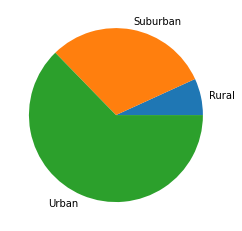

In [25]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

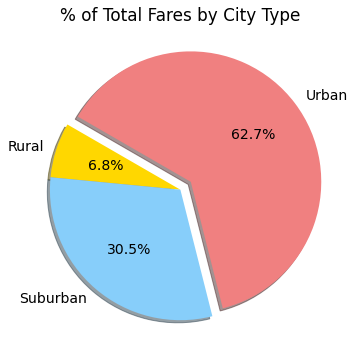

In [39]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Fig5.png")
# Show Figure
plt.show()